In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from common import NWSL, Colors, Fonts, Data, add_twitter_handle

In [2]:
# Calculate the total minutes for each season
totals = Data.get_nwsl_player_stats(include_early=True)
totals = totals.groupby(["season"]).agg(total_mins=("mins_played", "sum"))
totals

,total_mins
season,
2013,173887.0
2014,212635.0
2015,178137.0
2016,197949.0
2017,237369.0
2018,213828.0
2019,213648.0
2021,233422.0
2022,261180.0


In [3]:
SCHOOLS = {
    "University of North Carolina": "North Carolina",
    "University of California, Los Angeles": "UCLA",
    "Stanford University": "Stanford",
    "Penn State University": "Penn State",
    "Florida State University": "Florida State",
    "University of Virginia": "Virginia",
    "Santa Clara University": "Santa Clara",
    "University of Portland": "Portland",
    "University of Southern California": "Southern California",
    "University of Florida": "Florida",
    "Rutgers University": "Rutgers",
    "University of Notre Dame": "Notre Dame",
}

In [4]:
df = Data.get_nwsl_player_stats(include_early=True)
df = (
    df.set_index("player")
    .join(Data.get_nwsl_player_schools().set_index("name"))
    .reset_index()
)
df = df[df["school"] != "International"]
df = (
    df.groupby(["school", "season"])
    .agg(mins=("mins_played", "sum"))
    .sort_values("mins", ascending=False)
    .reset_index()
    .sort_values(["season", "mins"])
)
df = df.set_index("season").join(totals).reset_index()
df["mins_proportion"] = df["mins"] / df["total_mins"]
df = df[df["school"].isin(SCHOOLS.keys())]
df = df.pivot(index="school", columns="season", values="mins_proportion")
df

season,2013,2014,2015,2016,2017,2018,2019,2021,2022,2023
school,,,,,,,,,,
Florida State University,0.030376,0.040158,0.057658,0.076201,0.045760,0.020068,0.044208,0.038248,0.029171,0.060373
Penn State University,0.058831,0.058706,0.065051,0.061748,0.053528,0.046018,0.043296,0.042759,0.053032,0.048819
Rutgers University,0.007493,0.019569,0.011396,0.022698,0.022240,0.025955,0.029207,0.026219,0.021652,0.016884
Santa Clara University,0.038772,0.023350,0.041614,0.040041,0.031483,0.034308,0.037276,0.014086,0.033831,0.028400
Stanford University,0.065117,0.052014,0.044775,0.032468,0.052079,0.039583,0.066834,0.065140,0.061440,0.063500
"University of California, Los Angeles",0.053069,0.055080,0.063990,0.059657,0.086422,0.084320,0.065964,0.072992,0.060081,0.048373
University of Florida,0.048664,0.028288,0.020692,0.012938,0.030467,0.017509,0.015699,0.022894,0.020281,0.018215
University of North Carolina,0.075710,0.119971,0.093456,0.096262,0.057240,0.078110,0.091758,0.075053,0.043889,0.040604
University of Notre Dame,0.025321,0.018228,0.027529,0.023006,0.014648,0.010434,0.016312,0.014262,0.015254,0.014761


<Figure size 432x288 with 0 Axes>

<Figure size 5600x4000 with 0 Axes>

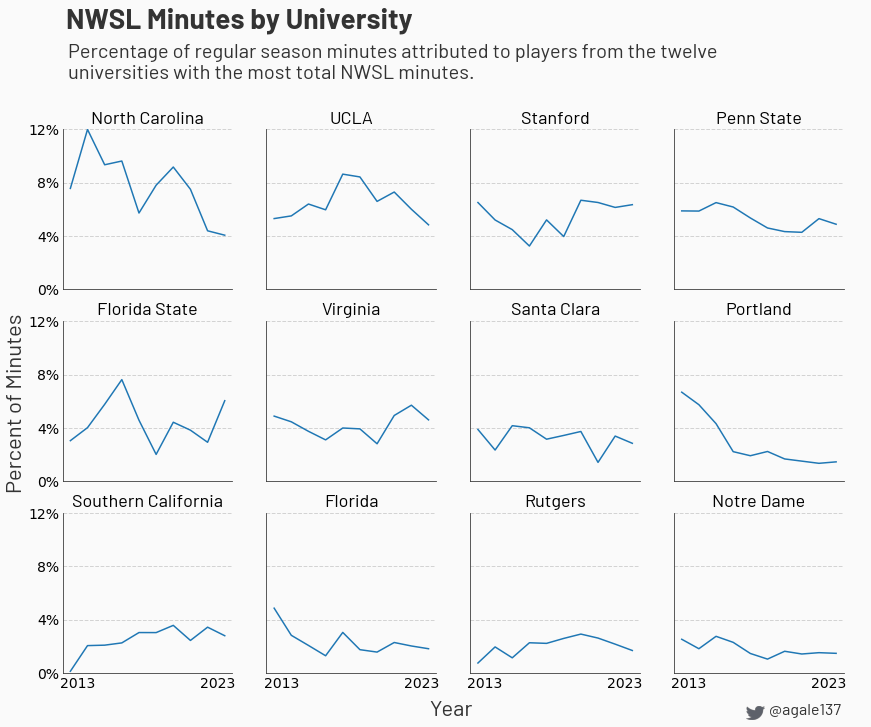

In [5]:
COLS = 4
ROWS = 3

# General
plt.clf()
plt.rcParams["figure.figsize"] = (14, 10)
plt.figure(dpi=400, facecolor=Colors.WHITE)
fig, axs = plt.subplots(ROWS, COLS)
fig.patch.set_facecolor(Colors.WHITE)

for i, school in enumerate(SCHOOLS.keys()):
    ax = axs[int(i / COLS), i % COLS]
    ax.set_facecolor(Colors.WHITE)

    # Set title
    ax.set_title(SCHOOLS[school], fontproperties=Fonts.BARLOW, size=18)

    # Plot data
    ax.plot(df.columns, df.loc[school], label=school)

    # Handle axes and ticks
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
    ax.set_ylim([0, 0.12])
    ax.set_yticks([0, 0.04, 0.08, 0.12])
    ax.tick_params(axis="both", which="both", length=0, labelsize=14)
    if i % COLS != 0:
        ax.yaxis.set_ticklabels([])
        ax.yaxis.set_ticks_position("none")

    ax.set_xticks(["2013", "2023"])
    ax.set_xticks(df.columns, minor=True)

    if int(i / COLS) == ROWS - 1:
        ax.xaxis.set_ticklabels([2013, 2023])
        for i, dx in [(0, 0.1), (1, -0.1)]:
            label = ax.xaxis.get_majorticklabels()[i]
            label.set_transform(
                label.get_transform()
                + mpl.transforms.ScaledTranslation(dx, 0, fig.dpi_scale_trans)
            )
    else:
        ax.xaxis.set_ticklabels([])
        ax.xaxis.set_ticks_position("none")

    ax.spines[["top", "right"]].set_visible(False)
    ax.spines[["bottom", "left"]].set_color(Colors.BLACK)
    # Add gridlines
    ax.set_axisbelow(True)
    ax.grid(axis="y", which="both", ls="--", color=Colors.LIGHT_GRAY, linewidth=1)

# Axis labels
fig.supxlabel(
    "Year", x=0.51, y=0.06, fontproperties=Fonts.BARLOW, size=22, color=Colors.BLACK
)
fig.supylabel(
    "Percent of Minutes",
    x=0.07,
    fontproperties=Fonts.BARLOW,
    size=22,
    color=Colors.BLACK,
)

# Titles
plt.suptitle(
    "NWSL Minutes by University",
    x=0.3,
    y=1.05,
    fontproperties=Fonts.BARLOW_BOLD,
    fontsize=28,
    color=Colors.BLACK,
)
plt.figtext(
    0.13,
    0.95,
    "Percentage of regular season minutes attributed to players from the twelve\nuniversities with the most total NWSL minutes.",
    fontproperties=Fonts.BARLOW,
    fontsize=20,
    color=Colors.BLACK,
)

add_twitter_handle(fig, x=0.8, y=0.06, fs=16, w=0.02)

# Save image
plt.savefig(
    "images/minutes_by_university.png",
    bbox_inches="tight",
    pad_inches=0.5,
    dpi=400,
)